In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [3]:
df = pd.read_csv("support_tickets.csv")
df.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,22-03-2021,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,01-06-2023 12:15,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,22-05-2021,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,01-06-2023 16:45,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,14-07-2020,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,01-06-2023 11:14,01-06-2023 18:05,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,13-11-2020,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,01-06-2023 07:29,01-06-2023 01:57,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,04-02-2020,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,01-06-2023 00:12,01-06-2023 19:53,1.0


In [4]:
df.columns

Index(['Ticket ID', 'Customer Name', 'Customer Email', 'Customer Age',
       'Customer Gender', 'Product Purchased', 'Date of Purchase',
       'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status',
       'Resolution', 'Ticket Priority', 'Ticket Channel',
       'First Response Time', 'Time to Resolution',
       'Customer Satisfaction Rating'],
      dtype='object')

In [5]:
X = df['Ticket Description']
y = df['Ticket Type']

In [6]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    return text

In [7]:
df['clean_text'] = X.apply(clean_text)

In [8]:
df[['Ticket Description', 'clean_text']].head()

,Ticket Description,clean_text
0,I'm having an issue with the {product_purchase...,i m having an issue with the product purchase...
1,I'm having an issue with the {product_purchase...,i m having an issue with the product purchase...
2,I'm facing a problem with my {product_purchase...,i m facing a problem with my product purchase...
3,I'm having an issue with the {product_purchase...,i m having an issue with the product purchase...
4,I'm having an issue with the {product_purchase...,i m having an issue with the product purchase...


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    df['clean_text'], y, test_size=0.2, random_state=42
)

In [10]:
vectorizer = TfidfVectorizer(max_features=5000)

In [11]:
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [12]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

LogisticRegression(max_iter=1000)

In [13]:
y_pred = model.predict(X_test_vec)

In [14]:
accuracy_score(y_test, y_pred)

0.19244391971664698

In [15]:
print(classification_report(y_test, y_pred))

                      precision    recall  f1-score   support

     Billing inquiry       0.16      0.11      0.13       357
Cancellation request       0.19      0.20      0.19       327
     Product inquiry       0.18      0.19      0.19       316
      Refund request       0.19      0.22      0.21       345
     Technical issue       0.23      0.24      0.23       349

            accuracy                           0.19      1694
           macro avg       0.19      0.19      0.19      1694
        weighted avg       0.19      0.19      0.19      1694



In [16]:
def assign_priority(ticket_type):
    if ticket_type in ['Technical', 'Network', 'Software']:
        return 'High'
    elif ticket_type in ['Billing', 'Payment']:
        return 'Medium'
    else:
        return 'Low'

In [17]:
df['Priority'] = df['Ticket Type'].apply(assign_priority)

In [18]:
df[['Ticket Type', 'Priority']].head()

,Ticket Type,Priority
0,Technical issue,Low
1,Technical issue,Low
2,Technical issue,Low
3,Billing inquiry,Low
4,Billing inquiry,Low


In [19]:
sample_ticket = ["Internet is not working and keeps disconnecting"]

In [20]:
sample_clean = vectorizer.transform(sample_ticket)

In [21]:
model.predict(sample_clean)

array(['Product inquiry'], dtype=object)

In [22]:
df.to_csv("support_tickets_with_priority.csv", index=False)

In [23]:
import matplotlib.pyplot as plt

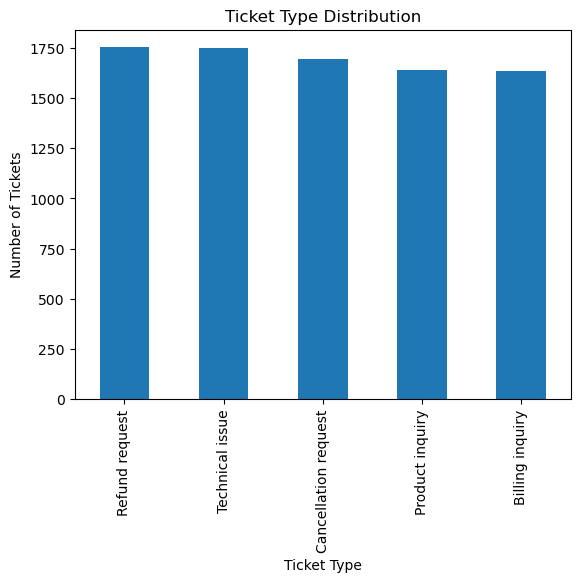

In [24]:
df['Ticket Type'].value_counts().plot(kind='bar')
plt.title("Ticket Type Distribution")
plt.xlabel("Ticket Type")
plt.ylabel("Number of Tickets")
plt.show()

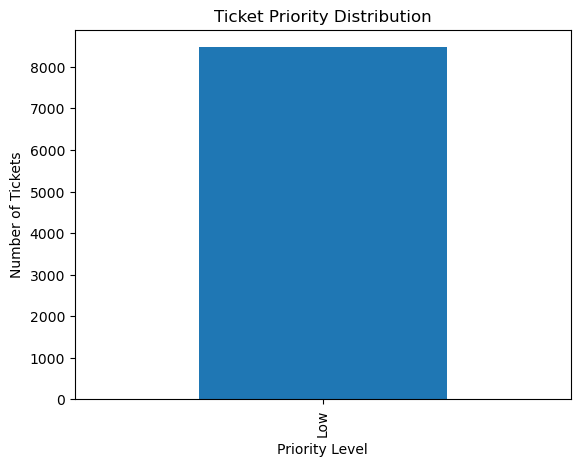

In [25]:
df['Priority'].value_counts().plot(kind='bar')
plt.title("Ticket Priority Distribution")
plt.xlabel("Priority Level")
plt.ylabel("Number of Tickets")
plt.show()

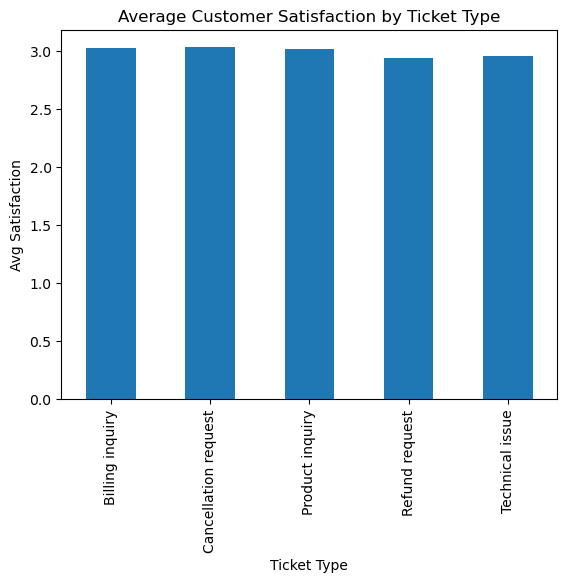

In [26]:
df.groupby('Ticket Type')['Customer Satisfaction Rating'].mean().plot(kind='bar')
plt.title("Average Customer Satisfaction by Ticket Type")
plt.ylabel("Avg Satisfaction")
plt.show()